## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('/home/rgukt-basar/E3-SEM2/ml LAB/WEEK-4/Housing.csv')
df
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [5]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y=df['price']

/home/rgukt-basar/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


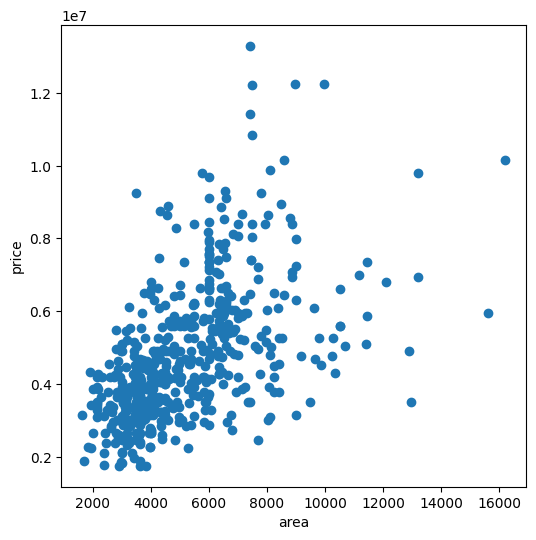

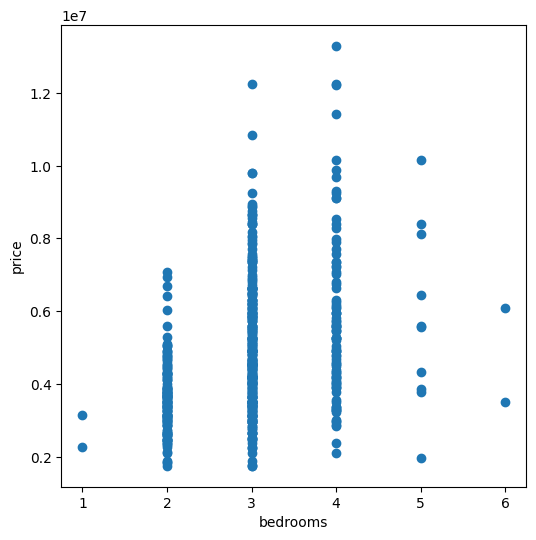

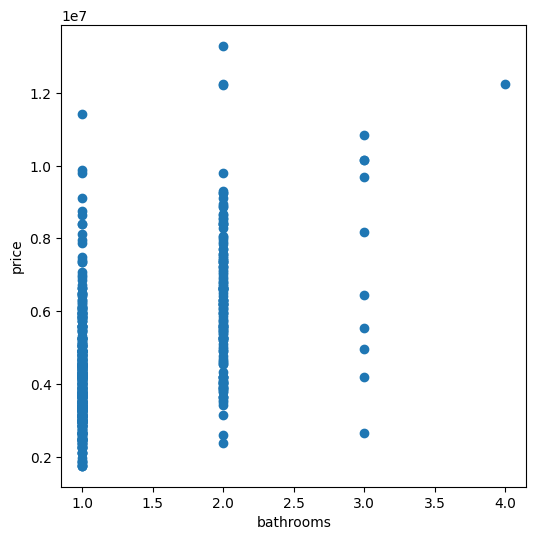

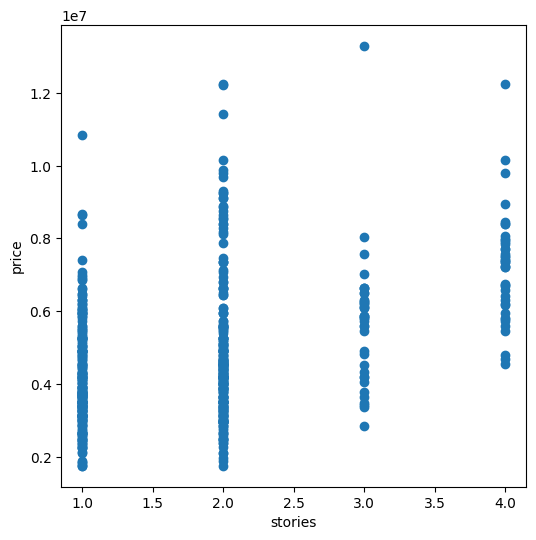

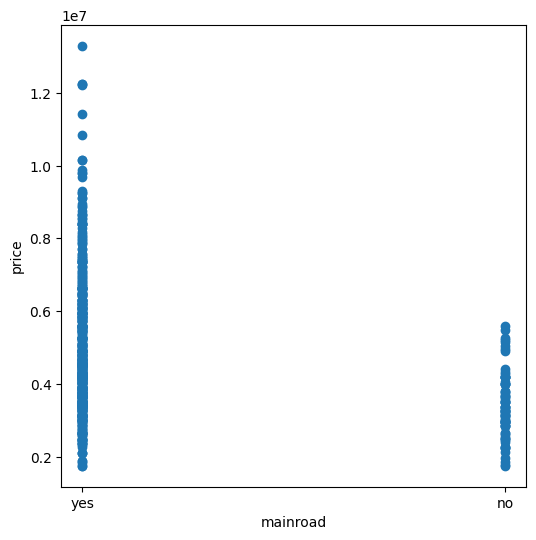

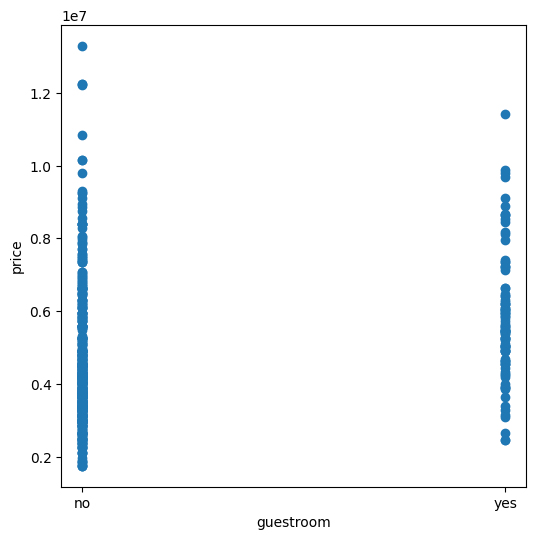

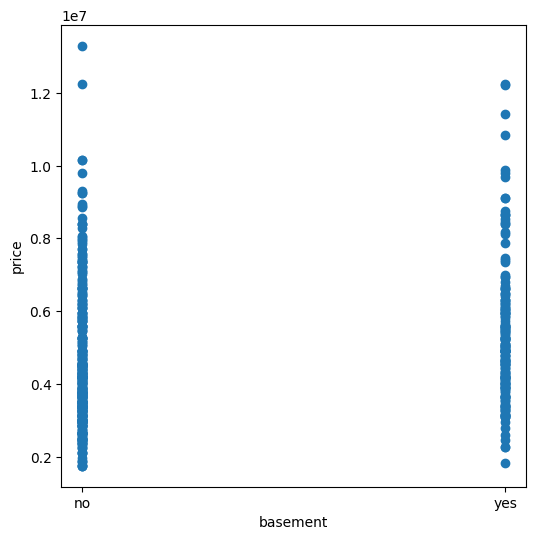

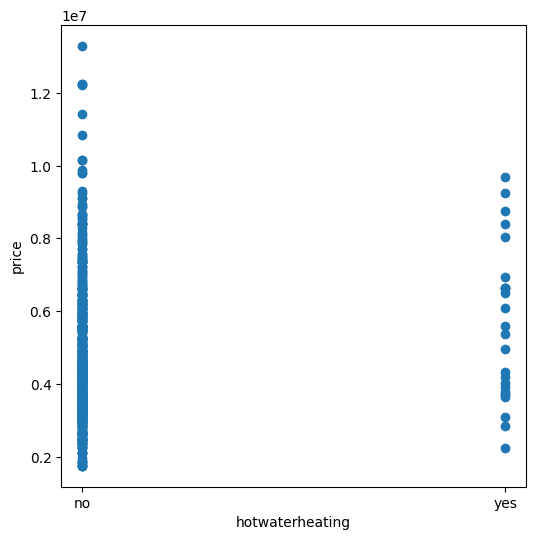

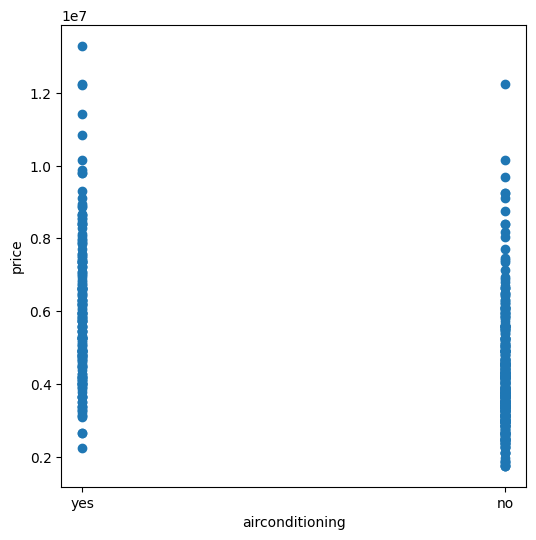

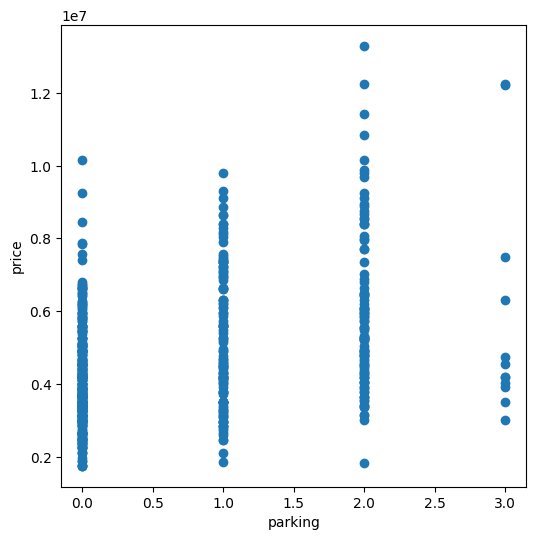

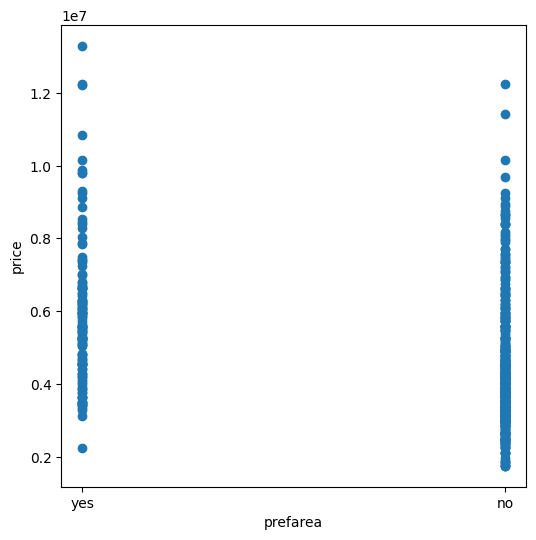

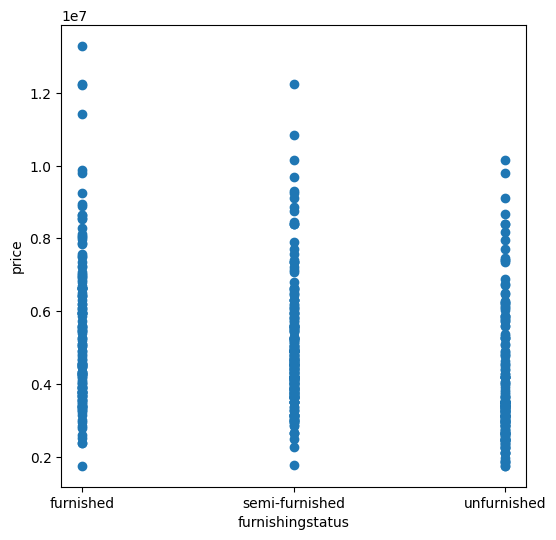

In [8]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
for col in x.columns:
    plt.figure(figsize=(6,6))
    plt.scatter(x[col],y)
    plt.xlabel(col)
    plt.ylabel('price')
   # plt.title(x.{col},price)
    plt.show()

In [11]:
#7 Encoding categorical data in X
binary_cols = ['mainroad', 'guestroom', 'basement', 
               'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    x[col] = x[col].map({'yes': 1, 'no': 0})


In [12]:
#8  Avoiding the Dummy Variable Trap
x = pd.get_dummies(x, columns=['furnishingstatus'], drop_first=True)

KeyError: "None of [Index(['furnishingstatus'], dtype='object')] are in the [columns]"

In [13]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x = pd.DataFrame(x_scaled, columns=x.columns)

print(x.head())


       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.046726  1.403419   1.421812  1.378217       NaN        NaN       NaN   
1  1.757010  1.403419   5.405809  2.532024       NaN        NaN       NaN   
2  2.218232  0.047278   1.421812  0.224410       NaN        NaN       NaN   
3  1.083624  1.403419   1.421812  0.224410       NaN        NaN       NaN   
4  1.046726  1.403419  -0.570187  0.224410       NaN        NaN       NaN   

   hotwaterheating  airconditioning   parking  prefarea  \
0              NaN              NaN  1.517692       NaN   
1              NaN              NaN  2.679409       NaN   
2              NaN              NaN  1.517692       NaN   
3              NaN              NaN  2.679409       NaN   
4              NaN              NaN  1.517692       NaN   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                        -0.844888                     -0.696429  
1                        -0.844888              

/home/rgukt-basar/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/rgukt-basar/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/rgukt-basar/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [14]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
x_test,x_train,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train model
model = LinearRegression()
model.fit(x_train, y_train)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#12 Predict on the train set and calculate the error = y_pred - y_train

# Predict on training data
y_train_pred = model.predict(x_train)

# Calculate error
error = y_train_pred - y_train

# Print first 10 errors
print("Prediction Errors (first 10):")
print(error[:10])


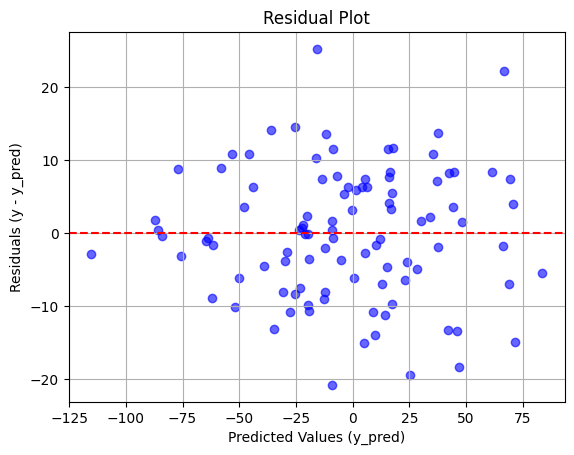

In [17]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Create sample regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit a regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Residuals
residuals = y - y_pred

# Plot residuals
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at y=0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y - y_pred)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [18]:
#14  Predic on the test set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sample data (you can replace this with your own dataset)
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 1. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Fit the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred_test = model.predict(X_test)

# 4. (Optional) Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on Test Set:", mse)


Mean Squared Error on Test Set: 104.20222653187027


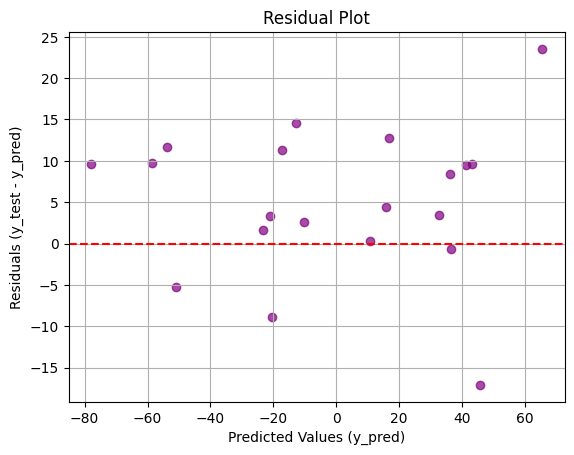

In [19]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.scatter(y_pred, residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [20]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you already have y_test and y_pred
# y_test = actual values
# y_pred = predicted values from your model

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print them
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Value:", r2)


Mean Squared Error (MSE): 104.20222653187027
R-squared (R²) Value: 0.9374151607623286


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Example data: Replace this with your real dataset
from sklearn.datasets import load_boston
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Let's try using only a subset of features
selected_features = ['RM', 'LSTAT', 'PTRATIO']  # example: select 3 features
X_selected = X[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# R-squared
r2 = r2_score(y_test, y_pred)

# Adjusted R-squared
n = X_test.shape[0]  # number of samples
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print results
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
